For the simulations we will select $X$ randomly in the interval [-5, 5]
and then calculate $Y$ through $Y = \sum_{j=0}^{3}\beta_jX^j + \epsilon$

In [252]:
import scipy
import numpy as np
from numpy.random import uniform
from numpy.random import randn
import matplotlib.pyplot as plt

In [257]:
N_points = 100
p = 3
beta = np.array([0.5, 5, 2, 1])
sigma = 50

X = uniform(-4, 4, N_points).reshape(N_points, 1)
X = np.c_[X**0, X, X**2, X**3]
Y = np.apply_along_axis(lambda v: sum(v * beta) + randn() * sigma, -1, X)

For the first approach, the confidence interval for $a^t\beta$ is equal to

$\left( a^T\hat{\beta} - t^{(1-\alpha)} \left(a^T(X^T X)^{-1}a \right)^{\frac{1}{2}}\hat{\sigma}, a^T\hat{\beta} + t^{(1-\alpha)} \left(a^T(X^T X)^{-1}a \right)^{\frac{1}{2}}\hat{\sigma} \right)$

since $a^T \hat{\beta} \sim N(a^T \beta, a^t(X^T X)^{-1}\sigma^2a^T)$

In [258]:
X_0 = np.linspace(-4, 4, N_points).reshape(N_points, 1)
X_0 = np.c_[X_0 ** 0, X_0, X_0 ** 2, X_0 ** 3]

beta_hat = np.linalg.inv(X.T @ X) @ X.T @ Y
sigma_hat = np.sqrt(sum((X @ beta_hat - Y) ** 2) / (N_points - p - 1))
t = scipy.stats.t.ppf(1 - 0.025, N_points - p - 1)

lower_1 = X_0 @ beta_hat - t * np.sqrt(np.sum(X_0 @ np.linalg.inv(X.T @ X) * X_0, axis=1)) * sigma_hat
upper_1 = X_0 @ beta_hat + t * np.sqrt(np.sum(X_0 @ np.linalg.inv(X.T @ X) * X_0, axis=1)) * sigma_hat

For the second approach we initially find the bounds for $\hat{\beta}$ and then find the

bounds for $a^T\hat{\beta}$ simply through $\left( a^T \hat{\beta}_{lower}, a^T \hat{\beta}_{upper} \right)$

In [259]:
beta_hat_lower = beta_hat - t * np.sqrt(np.diagonal(np.linalg.inv(X.T @ X)) * sigma_hat)
beta_hat_upper = beta_hat + t * np.sqrt(np.diagonal(np.linalg.inv(X.T @ X)) * sigma_hat)

lower_2 = np.minimum(X_0 @ beta_hat_lower, X_0 @ beta_hat_upper)
upper_2 = np.maximum(X_0 @ beta_hat_lower, X_0 @ beta_hat_upper)

Comparing the two approaches, we see that the first interval is wider and the difference is due to the covariances between the betas.

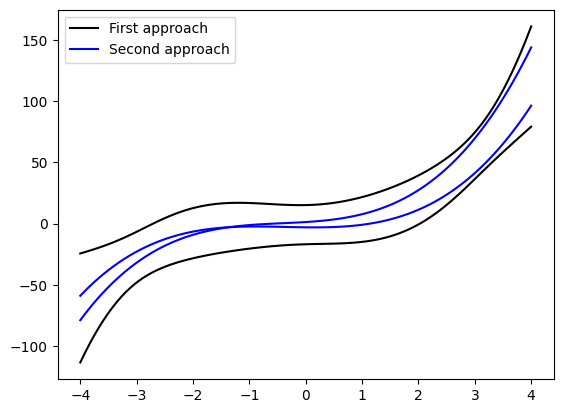

In [260]:
plt.plot(X_0[:, 1], lower_1, color='black')
plt.plot(X_0[:, 1], upper_1, color='black', label='_nolegend_')

plt.plot(X_0[:, 1], lower_2, color='blue')
plt.plot(X_0[:, 1], upper_2, color='blue', label='_nolegend_')

plt.legend(['First approach', 'Second approach']);